# HOMEWORK 15

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

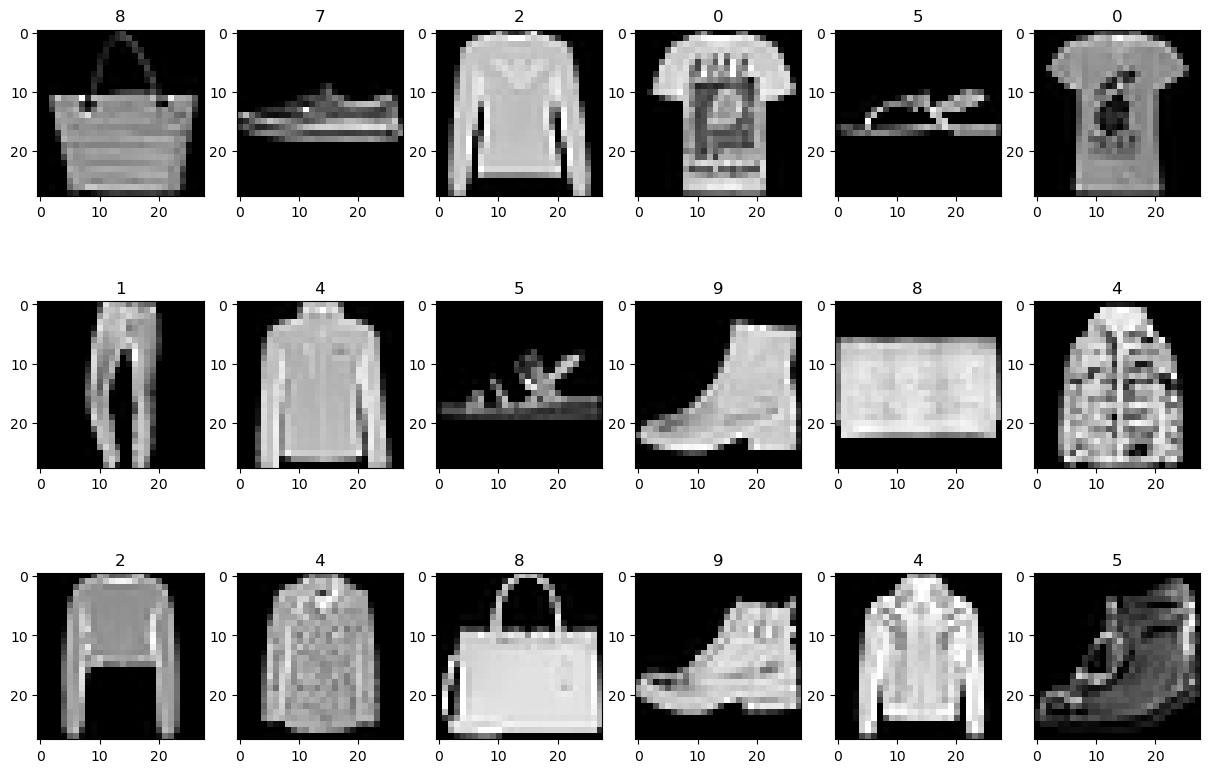

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [6]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50


2024-07-19 19:38:01.538214: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 30s 32ms/step - loss: 0.3786 - accuracy: 0.8665 - val_loss: 0.3206 - val_accuracy: 0.8847
Epoch 2/50
938/938 [==============================] - 27s 29ms/step - loss: 0.2599 - accuracy: 0.9062 - val_loss: 0.2967 - val_accuracy: 0.8936
Epoch 3/50
938/938 [==============================] - 21s 23ms/step - loss: 0.2200 - accuracy: 0.9201 - val_loss: 0.3013 - val_accuracy: 0.8945
Epoch 4/50
938/938 [==============================] - 27s 28ms/step - loss: 0.1885 - accuracy: 0.9308 - val_loss: 0.3002 - val_accuracy: 0.8987
Epoch 5/50
938/938 [==============================] - 31s 33ms/step - loss: 0.1678 - accuracy: 0.9386 - val_loss: 0.3120 - val_accuracy: 0.8985
Epoch 6/50
938/938 [==============================] - 23s 25ms/step - loss: 0.1507 - accuracy: 0.9451 - val_loss: 0.3161 - val_accuracy: 0.9012
Epoch 7/50
938/938 [==============================] - 31s 33ms/step - loss: 0.1329 - accuracy: 0.9514 - val_loss: 0.3360 - val_accuracy: 0.8978
Epo

Train Acc      0.9944999814033508
Validation Acc 0.88919997215271


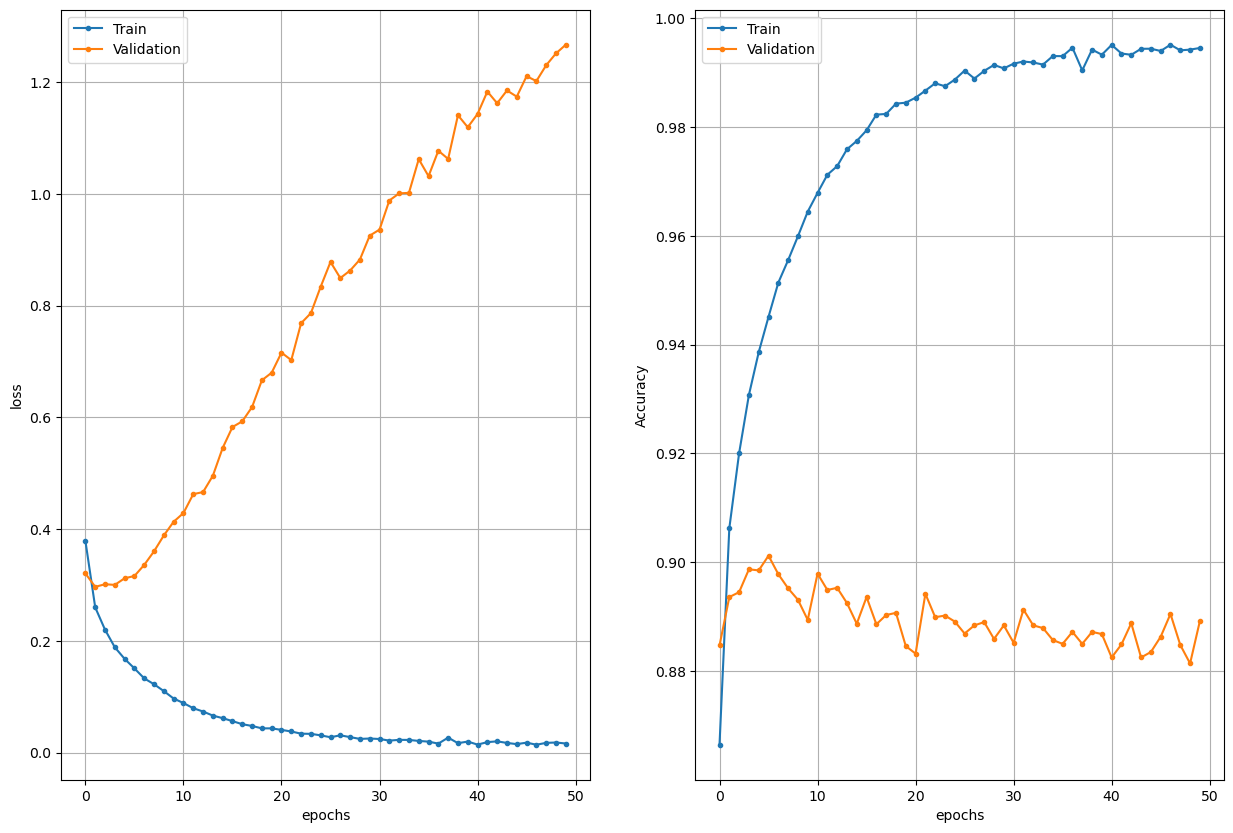

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [8]:
# Dropout
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model_dropout = Model(inputs, outputs)
model_dropout.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-tra

In [9]:
model_dropout.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_dropout = model_dropout.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 26s 28ms/step - loss: 0.4923 - accuracy: 0.8256 - val_loss: 0.3419 - val_accuracy: 0.8750
Epoch 2/50
938/938 [==============================] - 22s 24ms/step - loss: 0.3428 - accuracy: 0.8775 - val_loss: 0.3010 - val_accuracy: 0.8879
Epoch 3/50
938/938 [==============================] - 22s 24ms/step - loss: 0.3001 - accuracy: 0.8907 - val_loss: 0.2870 - val_accuracy: 0.8935
Epoch 4/50
938/938 [==============================] - 22s 24ms/step - loss: 0.2708 - accuracy: 0.9011 - val_loss: 0.2754 - val_accuracy: 0.8986
Epoch 5/50
938/938 [==============================] - 20s 21ms/step - loss: 0.2481 - accuracy: 0.9089 - val_loss: 0.2725 - val_accuracy: 0.9006
Epoch 6/50
938/938 [==============================] - 21s 22ms/step - loss: 0.2281 - accuracy: 0.9151 - val_loss: 0.2706 - val_accuracy: 0.9046
Epoch 7/50
938/938 [==============================] - 23s 25ms/step - loss: 0.2107 - accuracy: 0.9211 - val_loss: 0.2715 - val_accuracy:

Train Acc      0.9839833378791809
Validation Acc 0.9144999980926514


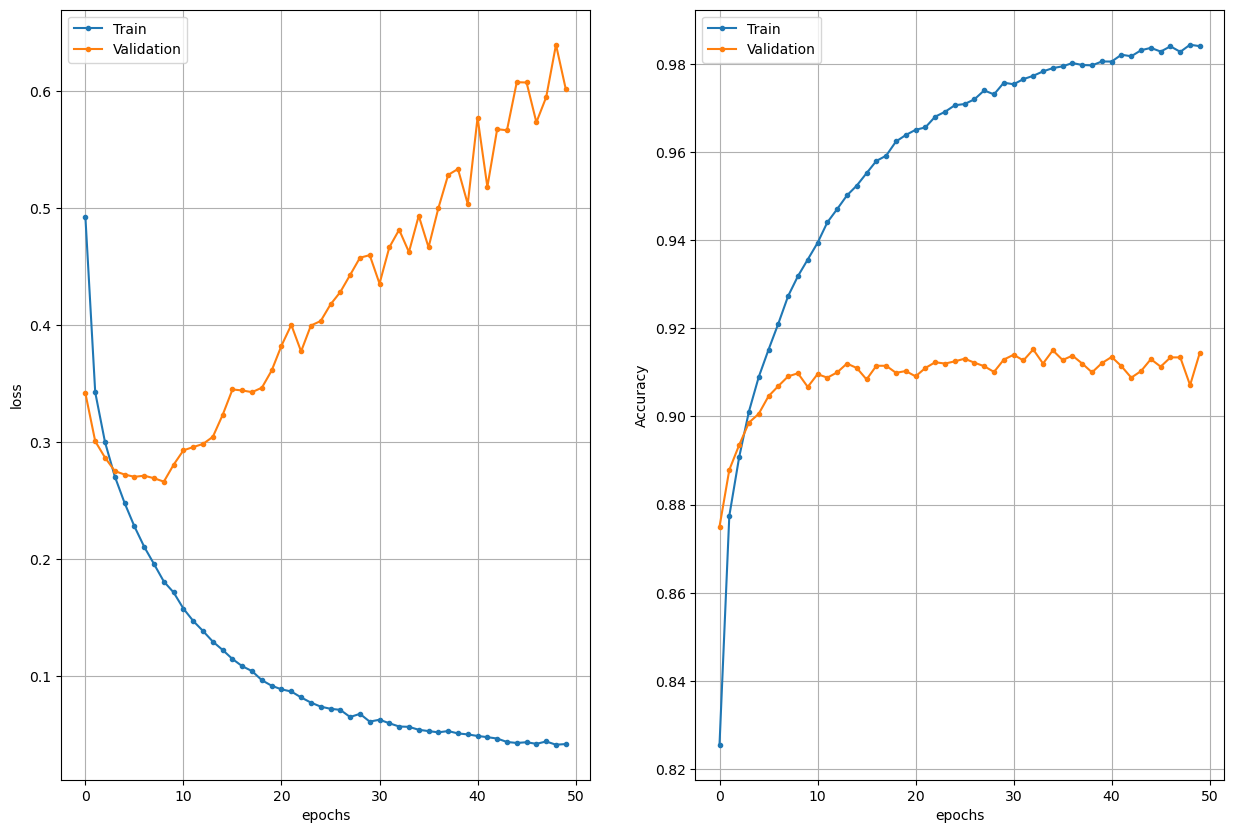

In [12]:
plot_history(history_dropout)
plt.show()

In [ ]:
# Batch Normalization
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = BatchNormalization()(net)
outputs = Dense(10, activation="softmax")(net)

model_batch_norm = Model(inputs, outputs)
model_batch_norm.summary()

model_batch_norm.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_batch_norm = model_batch_norm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plot_history(history_batch_norm)
plt.show()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3211392   
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                           

In [8]:
#Weight Regularization

from tensorflow.keras import regularizers

epochs = 50
batch_size = 64

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(net)
outputs = Dense(10, activation="softmax")(net)

model_weight_reg = Model(inputs, outputs)
model_weight_reg.summary()

model_weight_reg.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_weight_reg = model_weight_reg.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plot_history(history_weight_reg)
plt.show()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3211392   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2024-07-21 22:22:26.598704: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 13s 13ms/step - loss: 0.5870 - accuracy: 0.8409 - val_loss: 0.5217 - val_accuracy: 0.8564
Epoch 2/50
938/938 [==============================] - 12s 13ms/step - loss: 0.4848 - accuracy: 0.8688 - val_loss: 0.4888 - val_accuracy: 0.8649
Epoch 3/50
938/938 [==============================] - 12s 13ms/step - loss: 0.4501 - accuracy: 0.8771 - val_loss: 0.4473 - val_accuracy: 0.8778
Epoch 4/50
938/938 [==============================] - 14s 15ms/step - loss: 0.4204 - accuracy: 0.8841 - val_loss: 0.4241 - val_accuracy: 0.8809
Epoch 5/50
938/938 [==============================] - 13s 13ms/step - loss: 0.4036 - accuracy: 0.8886 - val_loss: 0.4289 - val_accuracy: 0.8782
Epoch 6/50
938/938 [==============================] - 13s 14ms/step - loss: 0.3936 - accuracy: 0.8928 - val_loss: 0.4192 - val_accuracy: 0.8848
Epoch 7/50
938/938 [==============================] - 13s 14ms/step - loss: 0.3815 - accuracy: 0.8958 - val_loss: 0.4109 - val_accuracy: 0.8840
Epo

NameError: name 'plot_history' is not defined

Train Acc      0.9263833165168762
Validation Acc 0.8950999975204468


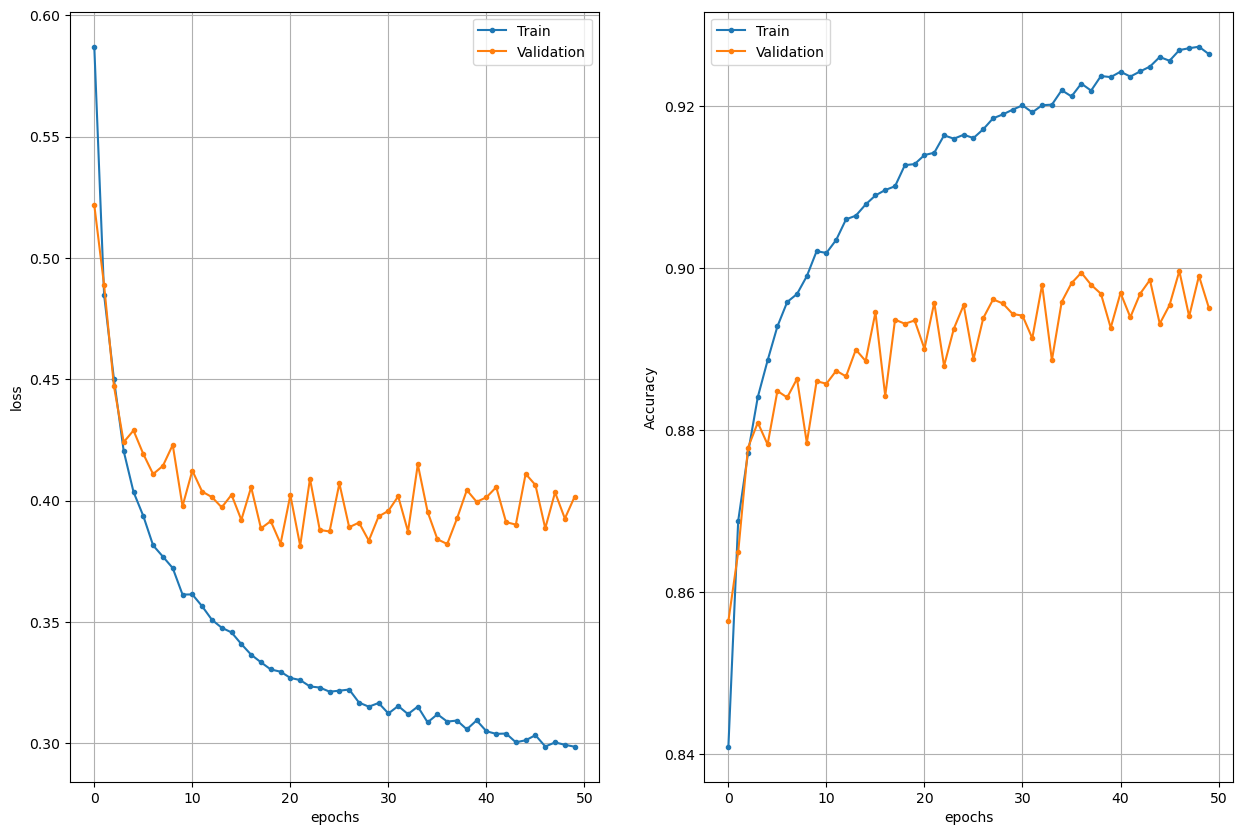

In [11]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history_weight_reg)

In [24]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)

outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the network
epochs = 50
batch_size = 64

history_combined = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_35 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 64)        184

Train Acc      0.9534333348274231
Validation Acc 0.9293000102043152


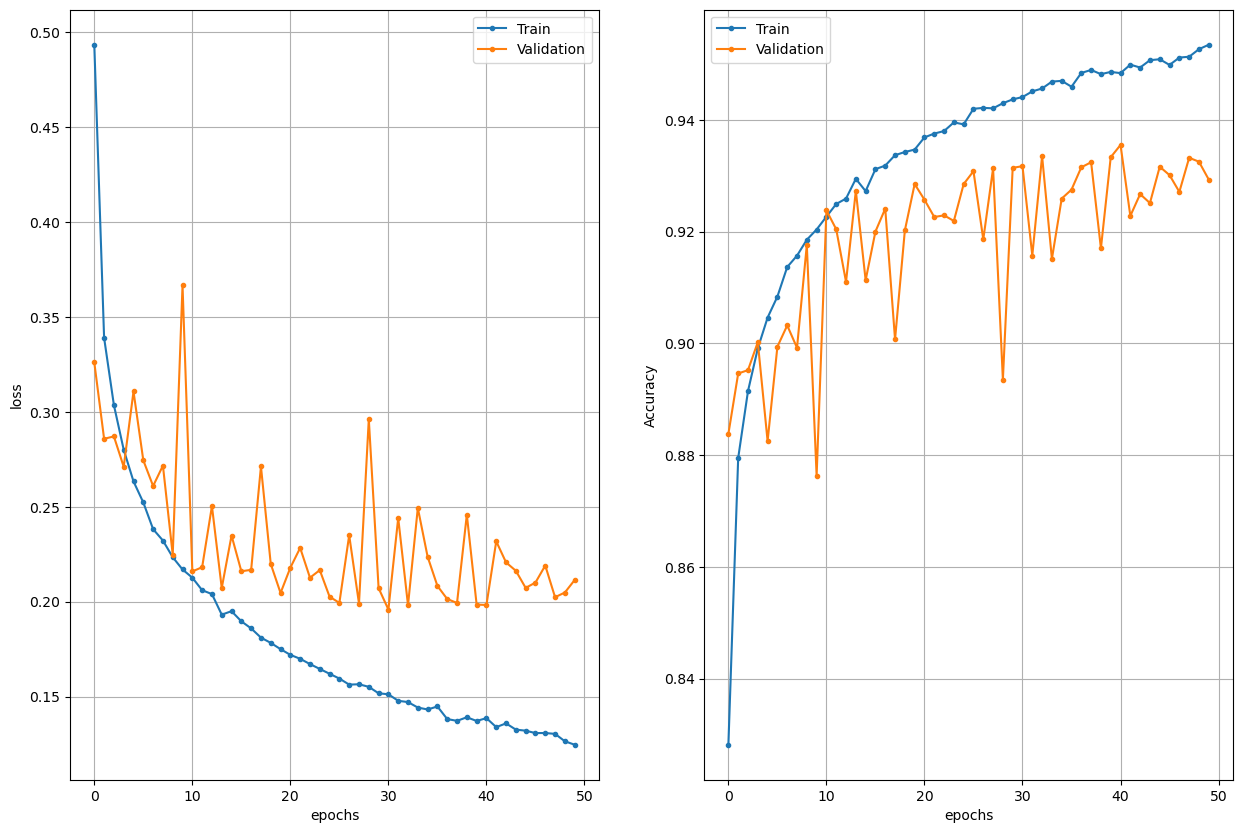

In [25]:
# Plotting the history
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121)
    plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    
    plt.subplot(122)
    plt.plot(epochs, h['accuracy'], '.-', epochs, h['val_accuracy'], '.-')
    plt.grid(True)
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history_combined)
plt.show()

### Questions

* What have you done to improve the performance?
* **I've tried 3 different methods (dropout, batch normalization and weight regularization), and "dropdown" was the most efficient one (got 91+ efficiency). Then I combined dropout and batch normalization, to get even better results (almost 93).**
* Have you tried configurations that did not work out?
* **All worked out, I've tried only 3 different options. Dropout was the most efficient. Weight regularization was the worst, maybe I did something wrong with it.**